<a href="https://colab.research.google.com/github/R0N3ldrt/Case_Study/blob/main/data_analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [1]:
# Importing necesary libraries
# Libraries for correct code execution 

import os, time, math, csv, joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import random
import csv
import re
import array
import seaborn as sns
import scipy.stats as st
import tensorflow

from tqdm import tqdm
from functools import reduce
from random import random, gauss
from math import modf, pi, cos, sin, sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from plotly.subplots import make_subplots
from scipy.signal import savgol_filter
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

import os, time, math, csv, joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

import tensorflow
import numpy
import matplotlib.pyplot

import warnings
warnings.filterwarnings("ignore")

sns.set_theme()

# Load Enviroment

In [2]:
# Google drive loading as work station for local-usage of the files.
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

#-----------------------------------------------------------------------------

Mounted at /content/gdrive


In [3]:
# Lista para cambiar los paths rapido.
workers = ["Ronald", "Local"]

# Change the number to change the paths.
worker = workers[0]

if worker == "Ronald":
  path = "/content/gdrive/MyDrive/Case_Study"
else: path = os.getcwd()

In [31]:
input_path = path + "/System_Data.xlsx"

working_df = pd.read_excel(input_path, sheet_name="System's Data")  

new_headers = {'Date of Transaction': 'date',
        'ATH Card Requested': 'card_type',
        "Transaction's Time (Minutes)": 'time',
        'Resource Name':'resoruce'}
 
# call rename () method
working_df.rename(columns=new_headers, inplace=True)
working_df

,date,card_type,time,resoruce
0,2021-05-14,ATH Plus,56.755266,Resource 5
1,2021-05-10,ATH Plus,57.135726,Resource 6
2,2021-05-05,ATH Blue,48.687329,Resource 5
3,2021-05-25,ATH Blue,49.218253,Resource 1
4,2021-06-22,ATH Plus,56.939096,Resource 1
...,...,...,...,...
1982,2021-06-03,ATH Blue,48.072876,Resource 6
1983,2021-06-07,ATH Plus,55.770817,Resource 4
1984,2021-05-12,ATH Blue,43.782064,Resource 3
1985,2021-05-28,ATH Blue,51.979217,Resource 3


# Time per resoruce

In [5]:
def resources_time(working_df, card_type_eval):
  resoruces_res = {}

  unique_resource = working_df.resoruce.unique()
  unique_resource = np.sort(unique_resource, axis = None)   

  for r in unique_resource:
    resoruce_eval_df = working_df.loc[working_df['resoruce'] == str(r)]
    
    card_type_resoruce_eval_df = resoruce_eval_df.loc[resoruce_eval_df['card_type'] == str(card_type_eval)]
    lower_ci = card_type_resoruce_eval_df.time.quantile(0.1) # 10th percentile
    mean = card_type_resoruce_eval_df.time.quantile(0.5) # same as median
    upper_ci = card_type_resoruce_eval_df.time.quantile(0.9) # 90th percentile
    resoruces_res[str(r)] =  [lower_ci, mean, upper_ci]

  return resoruces_res

In [6]:
r_blue_res = resources_time(working_df, card_type_eval='ATH Blue')

r_blue_df = pd.DataFrame.from_dict(r_blue_res)
r_blue_df.insert(0, "Perentile", ['10th', '50th', '90th'], True)
r_blue_df

,Perentile,Resource 1,Resource 2,Resource 3,Resource 4,Resource 5,Resource 6
0,10th,47.295333,47.356013,46.545716,46.757876,46.888055,46.742143
1,50th,50.084125,50.437850,49.510291,50.034560,49.942985,49.531491
2,90th,53.462312,53.361559,52.875597,53.273702,53.256914,53.170573


In [7]:
r_plus_res = resources_time(working_df, card_type_eval='ATH Plus')

r_plus_df = pd.DataFrame.from_dict(r_plus_res)
r_plus_df.insert(0, "Perentile", ['10th', '50th', '90th'], True)
r_plus_df

,Perentile,Resource 1,Resource 2,Resource 3,Resource 4,Resource 5,Resource 6
0,10th,51.873558,51.763422,52.263437,51.036246,52.731210,51.853294
1,50th,54.821868,54.643444,55.134669,55.080262,55.293563,54.954185
2,90th,58.257302,57.632809,57.748453,58.537279,58.301045,58.044267


# Date Evaluation

In [43]:
def get_daily_process_time(working_df, card_type_eval):
  working_df = working_df.drop('resoruce', axis=1)
  
  sorted_date = working_df.sort_values(by='date')
  sorted_date = sorted_date.loc[sorted_date['card_type'] == str(card_type_eval)]  
  sorted_date = sorted_date.groupby(['date']).mean()
  sorted_date.reset_index(inplace=True)

  sorted_date['weekday'] = sorted_date['date'].dt.day_name()

  return sorted_date

,date,time,weekday
0,2021-05-03,50.306628,Monday
1,2021-05-04,50.575711,Tuesday
2,2021-05-05,48.975792,Wednesday
3,2021-05-06,50.084492,Thursday
4,2021-05-07,49.629322,Friday
5,2021-05-10,50.302334,Monday
6,2021-05-11,50.941482,Tuesday
7,2021-05-12,50.366480,Wednesday
8,2021-05-13,51.199103,Thursday
9,2021-05-14,49.792551,Friday


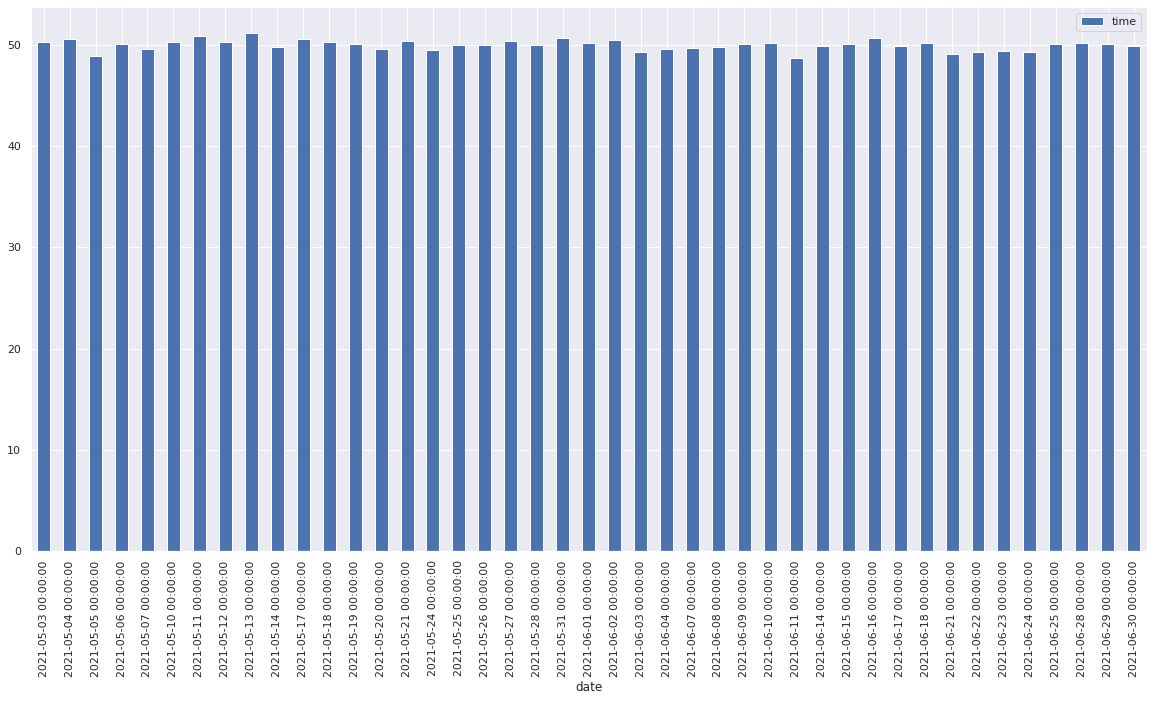

In [53]:
daily_measurement_df = get_daily_process_time(working_df, card_type_eval='ATH Blue')
display(daily_measurement_df)

daily_measurement_df.plot(x ='date', y='time', kind = 'bar', figsize=(20, 10))

,date,time,weekday
0,2021-05-03,54.860525,Monday
1,2021-05-04,55.326913,Tuesday
2,2021-05-05,54.686478,Wednesday
3,2021-05-06,55.551630,Thursday
4,2021-05-07,55.196856,Friday
5,2021-05-10,55.871324,Monday
6,2021-05-11,54.872794,Tuesday
7,2021-05-12,54.821171,Wednesday
8,2021-05-13,54.067179,Thursday
9,2021-05-14,54.584132,Friday


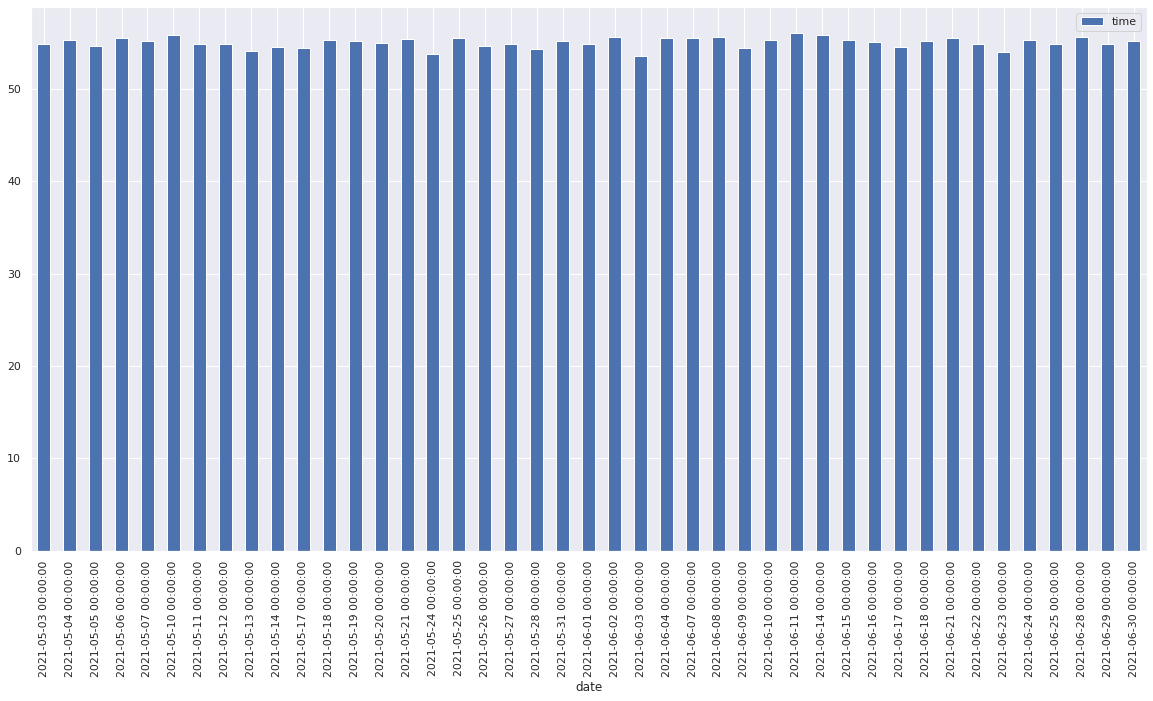

In [54]:
daily_measurement_df = get_daily_process_time(working_df, card_type_eval='ATH Plus')
display(daily_measurement_df)

daily_measurement_df.plot(x ='date', y='time', kind = 'bar', figsize=(20, 10))